<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Harry\AppData\Local\Temp\ipykernel_14072\4141930148.py:7: SyntaxWarning: invalid escape sequence '\S'
  image_path = 'W:\Spinal Cord Wedge Shape Plain.jpg'  # Replace with the actual path to your image


Output image saved to Result1.png


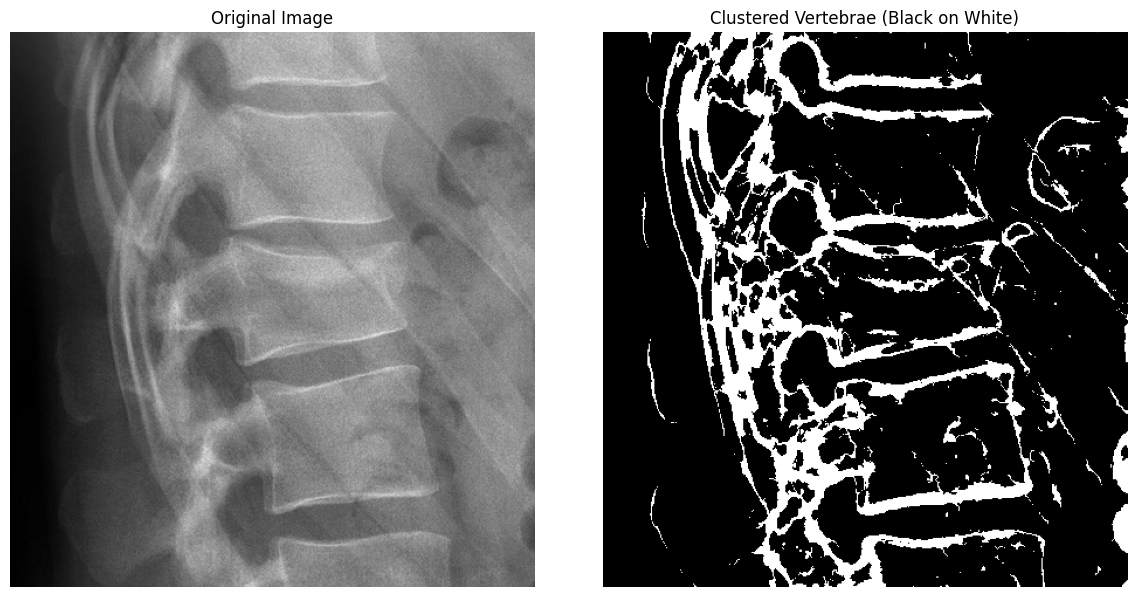

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Load the image
image_path = 'W:\Spinal Cord Wedge Shape Plain.jpg'  # Replace with the actual path to your image
img = cv2.imread(image_path)

if img is None:
    print(f"Error: Could not open or find the image at {image_path}")
else:
    # 1. Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray

    # 2. Apply Gaussian blur (optional)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # 3. Create feature vectors for each pixel
    rows, cols = blurred.shape
    features = []
    for r in range(rows):
        for c in range(cols):
            features.append([r, c, blurred[r, c]])
    features = np.array(features)

    # 4. Apply DBSCAN clustering with adjusted parameters
    # Try smaller eps and potentially larger min_samples
    dbscan = DBSCAN(eps=5, min_samples=38)
    clusters = dbscan.fit_predict(features)

    # 5. Reshape the cluster labels to the original image dimensions
    clustered_image = clusters.reshape((rows, cols))

    # 6. Create a colored output image (white background)
    output_img = np.ones_like(img) * 255

    # 7. Color the clustered regions black
    unique_labels = np.unique(clustered_image)
    for label in unique_labels:
        if label != -1:  # Ignore noise points (label -1)
            mask = (clustered_image == label)
            output_img[mask] = [0, 0, 0]

    # Save the output image
    output_path = 'Result1.png'  # Specify the desired file name and format
    cv2.imwrite(output_path, output_img)
    print(f"Output image saved to {output_path}")

    # Display the results
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(output_img)
    plt.title('Clustered Vertebrae (Black on White)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()